# Pelatihan, Tuning, dan Evaluasi Model

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

from src.pipeline import run_pipeline
from src.config import DATA_RAW_PATH, RESULTS_PATH, SAVED_MODEL_PATH

## Menjalankan Pipeline Pelatihan

Menjalankan seluruh alur kerja:
1.  Memuat gambar dari `data/raw` (termasuk augmentasi).
2.  Melakukan pra-pemrosesan dan menyimpan gambar yang diproses ke `data/processed`.
3.  Mengekstrak fitur gabungan (HOG, Color, LBP) dari setiap gambar.
4.  Membagi data menjadi set pelatihan dan pengujian.
5.  Melakukan tuning hyperparameter (Grid Search) pada pipeline SVM + PCA.
6.  Melatih model terbaik pada seluruh data pelatihan.
7.  Menyimpan model terlatih ke `saved_models/svm_model.pkl`.
8.  Mengevaluasi model pada data pengujian dan menyimpan hasilnya di `experiments/results`.

**Peringatan:** Proses ini mungkin memakan waktu cukup lama, terutama pada tahap Grid Search.

In [2]:
# Pastikan direktori yang diperlukan ada
os.makedirs(os.path.dirname(SAVED_MODEL_PATH), exist_ok=True)
os.makedirs(RESULTS_PATH, exist_ok=True)

# Jalankan pipeline
run_pipeline(data_path=DATA_RAW_PATH)

2025-09-30 19:37:35,313 - INFO - dataset_loader - Memuat gambar dari 'c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\data\raw'...
Loading Sunrise: 100%|██████████| 357/357 [00:09<00:00, 36.95it/s]
2025-09-30 19:37:54,266 - INFO - dataset_loader - Total gambar yang berhasil dimuat (termasuk augmentasi): 4492
2025-09-30 19:37:54,280 - INFO - pipeline - Memulai prapemrosesan, penyimpanan gambar, dan ekstraksi fitur...
Processing Images: 100%|██████████| 4492/4492 [01:07<00:00, 66.45it/s]
2025-09-30 19:39:02,373 - INFO - pipeline - Ekstraksi fitur selesai. Bentuk matriks fitur: (4492, 8370)
2025-09-30 19:39:02,688 - INFO - pipeline - Data dibagi: 3593 train, 899 test.
2025-09-30 19:39:02,703 - INFO - svm_classifier - ==================================================
2025-09-30 19:39:02,704 - INFO - svm_classifier - MEMULAI TUNING HYPERPARAMETER (GRID SEARCH)
2025-09-30 19:39:02,705 - INFO - svm_classifier - Parameter Grid yang Diuji: {'svc__C': [1, 10, 50, 100], 'svc__g

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  21.3s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  19.8s
[CV] END ..........................svc__C=1, svc__gamma=0.01; total time=  20.0s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  19.2s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  19.5s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=  20.1s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=  19.0s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=  19.9s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=  19.9s
[CV] END ........................svc__C=1, svc__gamma=0.0001; total time=  14.6s
[CV] END ........................svc__C=1, svc__gamma=0.0001; total time=  14.6s
[CV] END ........................svc__C=1, svc__

2025-09-30 19:54:54,696 - INFO - svm_classifier - 
Tuning selesai.
2025-09-30 19:54:54,697 - INFO - svm_classifier - Parameter terbaik ditemukan: {'svc__C': 10, 'svc__gamma': 0.0001}
2025-09-30 19:54:54,698 - INFO - svm_classifier - Skor cross-validation terbaik: 0.9468
2025-09-30 19:54:54,699 - INFO - svm_classifier - PCA memilih 1137 komponen.
2025-09-30 19:54:54,830 - INFO - svm_classifier - Model berhasil disimpan di c:\Users\HP\Documents\PythonProjects\ML\klasifikasi-cuaca-svm\svm\saved_models\svm_model.pkl
2025-09-30 19:54:54,831 - INFO - pipeline - Mengevaluasi model pada data test...
2025-09-30 19:54:56,294 - INFO - metrics - 
Akurasi Keseluruhan: 0.9644

2025-09-30 19:54:56,295 - INFO - metrics - Laporan Klasifikasi:
              precision    recall  f1-score   support

      Cloudy       0.95      0.97      0.96       240
        Rain       0.94      0.98      0.96       171
       Shine       0.98      0.93      0.95       202
     Sunrise       0.98      0.98      0.98    

## Menampilkan Hasil Evaluasi

Menampilkan laporan klasifikasi serta *confusion matrix* yang telah dihasilkan.

In [3]:
# Baca dan tampilkan laporan klasifikasi
report_path = os.path.join(RESULTS_PATH, 'classification_report.txt')
try:
    with open(report_path, 'r') as f:
        classification_report_content = f.read()
    print("--- Laporan Klasifikasi ---")
    print(classification_report_content)
except FileNotFoundError:
    print(f"File laporan klasifikasi tidak ditemukan di: {report_path}")

--- Laporan Klasifikasi ---
Akurasi Keseluruhan: 0.9644

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Cloudy       0.95      0.97      0.96       240
        Rain       0.94      0.98      0.96       171
       Shine       0.98      0.93      0.95       202
     Sunrise       0.98      0.98      0.98       286

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



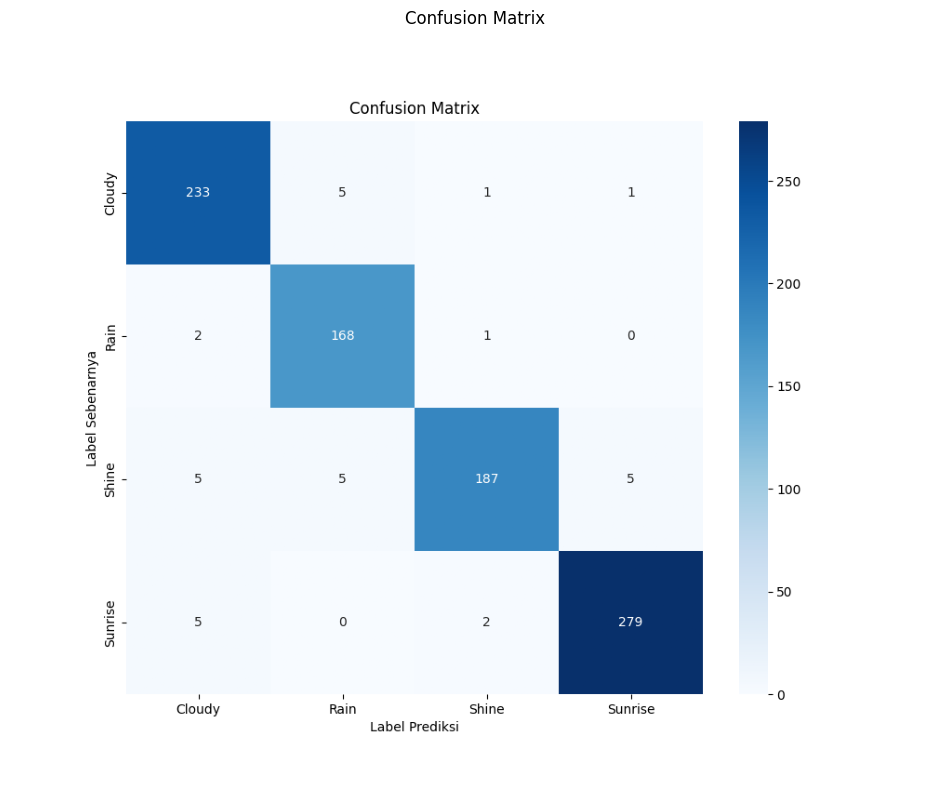

In [4]:
# Tampilkan confusion matrix
cm_path = os.path.join(RESULTS_PATH, 'confusion_matrix.png')
try:
    img = mpimg.imread(cm_path)
    plt.figure(figsize=(12, 10))
    plt.imshow(img)
    plt.title('Confusion Matrix')
    plt.axis('off')
    plt.show()
except FileNotFoundError:
    print(f"File confusion matrix tidak ditemukan di: {cm_path}")